# ⚜ Proyecto de machine learning ⚜

Lauxmann Ezequiel

In [1]:
#!kill -9 -1
#files.upload()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
#from google.colab import files
from importlib import reload
from class_data import *
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# ⚫ train.parquet

In [3]:
# Ruta del train y creacion del df.

path = '/home/ezequiell/Escritorio/proyecto_2/PI_2/DATA/train.parquet'

df_train = pd.read_parquet(path)

In [4]:
# Dimensiones del df_train

df_train.shape

(346479, 22)

In [5]:
# Registros duplicados.

print('La cantidad de registros duplicados es:', df_train.duplicated().sum())

La cantidad de registros duplicados es: 0


In [6]:
# Registros vacios.

df_train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

🔸 Procedere a ver los % de valores faltantes para saber que metodo de insersión de datos utilizar en cada uno.

In [7]:
print('Porcentaje de valores faltantes de la variable laundry_options:', (df_train['laundry_options'].isnull().sum()/len(df_train)) * 100)

Porcentaje de valores faltantes de la variable laundry_options: 20.541216062156725


In [8]:
print('Porcentaje de valores faltantes de la variable parking_options:', (df_train['parking_options'].isnull().sum()/len(df_train)) * 100)

Porcentaje de valores faltantes de la variable parking_options: 36.56267768032117


In [9]:
print('Porcentaje de valores faltantes de la variable lat:', (df_train['lat'].isnull().sum()/len(df_train)) * 100)

Porcentaje de valores faltantes de la variable lat: 0.49699981817079825


In [10]:
print('Porcentaje de valores faltantes de la variable long:', (df_train['long'].isnull().sum()/len(df_train)) * 100)

Porcentaje de valores faltantes de la variable long: 0.49699981817079825


🔸 Identifico poca cantidad de valores faltantes en lat y long, por lo que decido hacer una imputación con el método KNN.

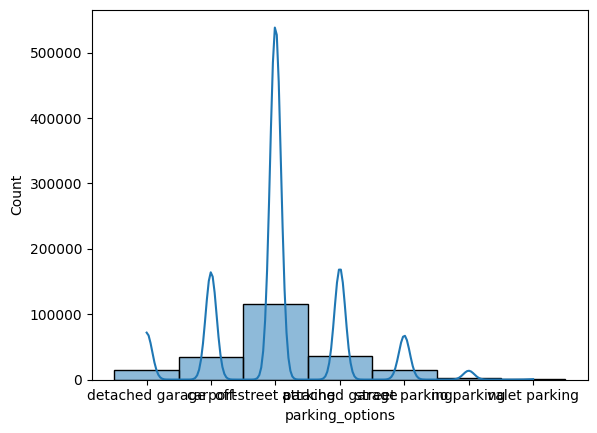

In [11]:
# Veamos cómo se distribuye la variable parking_options

sns.histplot(x = 'parking_options', data= df_train, kde = True)
plt.show()

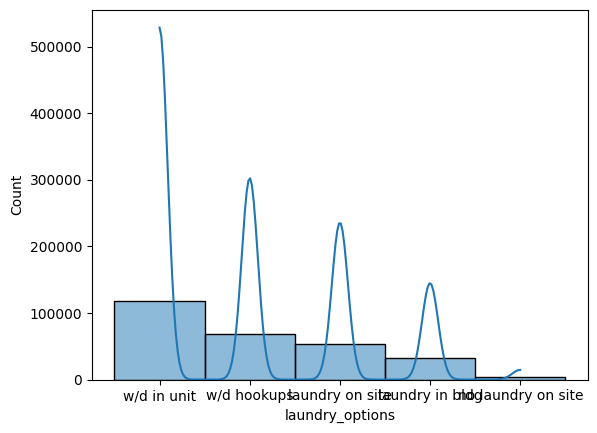

In [12]:
# Veamos cómo se distribuye la variable laundry_options

sns.histplot(x = 'laundry_options', data= df_train, kde = True)
plt.show()

🔸 Decidí reemplazar los valores faltantes por 'ukn' y ver luego como queda distribuido.

🚫 Detección de outliers.

In [13]:
# Reveo el df

df_train

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,7050982281,https://evansville.craigslist.org/apa/d/evansv...,evansville,https://evansville.craigslist.org,672,apartment,660,1,1.0,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00x0x_9oaHKZ8Ilp...,"The pool, the office, the 24-hour on-site laun...",37.9591,-87.5293,in
346475,7049418251,https://sandiego.craigslist.org/ssd/apa/d/chul...,san diego,https://sandiego.craigslist.org,2122,apartment,1099,2,2.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00O0O_6QsU4p5WMh...,Seize your chance to live in our beautiful apa...,32.6279,-117.0370,ca
346476,7048268235,https://columbia.craigslist.org/apa/d/columbia...,columbia,https://columbia.craigslist.org,1014,apartment,1104,2,2.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_dpNWqzYhGK...,Tucked into the rolling landscape of Southeast...,33.9659,-80.9355,sc
346477,7026721229,https://nd.craigslist.org/apa/d/minot-open-con...,north dakota,https://nd.craigslist.org,935,apartment,1050,2,2.0,0,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00Z0Z_65g6Cty1RX...,Enjoy living at Southwood Apartments! Located ...,48.1995,-101.2800,nd


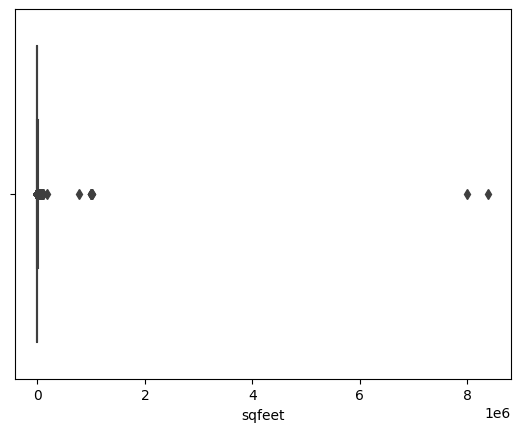

In [14]:
# Outliers en 'sqfeet'

sns.boxplot(x = 'sqfeet', data = df_train)
plt.show()

✅ *Visto los datos, lo que decidí es hacer un pipeline el cual contenga una serie de clases las cuales modificaran el df_train y así dejarlo en condiciones para usarlo en un modelo predictivo de aprendizaje supervisado.
Cada una de las clases estaran en `class_data.py` y explicadas en la misma.*

In [15]:
# Creación del pipeline

transformadores = [('data_clean', data_clean()),
                ('outlier', outliers()),
             ('price', category_price())]
pipeline_trafo = Pipeline(transformadores)

In [16]:
# Aplico el Pipeline y visualizo el df_train.

pipeline_trafo.fit(df_train)
df_train = pipeline_trafo.transform(df_train)
df_train = df_train.drop(columns=['type_assisted living', 'type_land'])
df_train

,region,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_loft,type_manufactured,type_townhouse,category_price
0,0,1200,2,2.0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,694,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,900,2,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1469,3,2.0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,700,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,159,660,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
346475,62,1099,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346476,125,1104,2,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346477,212,1050,2,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
# Distribución de parking_options post pipeline.

#sns.histplot(x = 'parking_options', data= df_train, kde = True)
#plt.show()

In [18]:
# Distribución de laundry_options post pipeline.

#sns.histplot(x = 'laundry_options', data= df_train, kde = True)
#plt.show()

🔶 Como se puede apreciar, al agregarse un nuevo valor como 'ukn', a la distribucion se le sumo una columna mas; lo que quiero con esto es darle un valor a esos campos vacios sin necesidad de borrar toda la columna por la falta del 20 y 30 % de los datos.

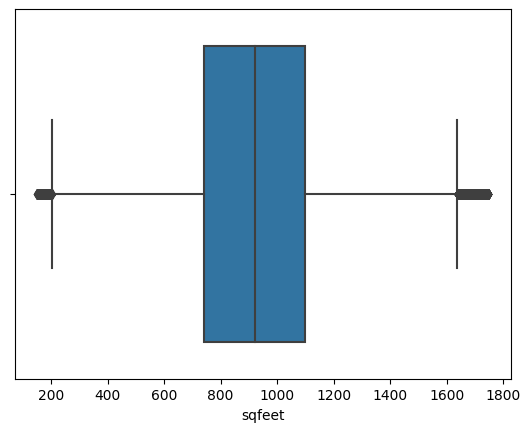

In [19]:
# Outliers en 'sqfeet' post pipeline.

sns.boxplot(x = 'sqfeet', data = df_train)
plt.show()

In [20]:
# Dimensiones del df_train post pipeline.

df_train.shape

(315560, 38)

In [21]:
df_train['category_price'].shape

(315560,)

**🔶Entrenamiento del modelo**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [23]:
list_column = [x for x in df_train]

list_column.remove('category_price')
#print(list_column)

#Creo lista para indicar en X
df_train_x = df_train.drop(columns=['category_price'])
X = df_train_x
# Columnas de entrada para el entrenamiento.

df_train_y = df_train[['category_price']]
y = df_train_y
# Columna de salida

# parametros para el grid
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Separar los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#Division entre train y testeo.

clf = DecisionTreeClassifier()

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Entrenar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados: ", grid_search.best_params_)

#Prediccion
y_pred = grid_search.predict(X_test)


Mejores parámetros encontrados:  {'max_depth': 20, 'min_samples_split': 2}


In [24]:
# Recall

recall = recall_score(y_test, y_pred)
    
print(f"El recall del modelo es de: {recall}")

El recall del modelo es de: 0.9287285245274599


# ⚫ test.parquet

In [25]:
# Ruta del test y creacion del df

path = '/home/ezequiell/Escritorio/proyecto_2/PI_2/DATA/test.parquet'

df_test = pd.read_parquet(path)
df_test

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,apartment,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,apartment,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,7041556338,https://mobile.craigslist.org/apa/d/daphne-lux...,mobile,https://mobile.craigslist.org,apartment,1180,2,2.0,1,1,...,1,0,0,w/d in unit,detached garage,https://images.craigslist.org/01616_lCR9AY6Vlb...,At Belforest Villas youâll have all the conv...,30.6197,-87.8895,al
38494,7051072582,https://elpaso.craigslist.org/apa/d/el-paso-th...,el paso,https://elpaso.craigslist.org,apartment,1138,3,2.0,1,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/01010_fEVpb2QLmX...,Ready for the CrossPointe Experience show con...,31.8045,-105.9660,tx
38495,7048966175,https://tampa.craigslist.org/hil/apa/d/brandon...,tampa bay area,https://tampa.craigslist.org,apartment,743,1,1.0,1,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00r0r_b7LZqSM75f...,To schedule a tour We now book our tour appoin...,27.8971,-82.3387,fl
38496,7044693740,https://mohave.craigslist.org/apa/d/fort-mohav...,mohave county,https://mohave.craigslist.org,house,1276,3,2.0,0,0,...,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/00606_21aHFx5Gtq...,"House for Rent (1 year lease - min. ) - 3 Bed,...",35.0052,-114.5690,az


In [26]:
# Dimensiones del df_test.

df_test.shape

(38498, 21)

In [27]:
# Datos nulos.

df_test.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             7855
parking_options            14005
image_url                      0
description                    0
lat                          196
long                         196
state                          0
dtype: int64

In [28]:
print('Porcentaje de valores faltantes de la variable laundry_options:', (df_test['laundry_options'].isnull().sum()/len(df_test)) * 100)

Porcentaje de valores faltantes de la variable laundry_options: 20.40365733284846


In [29]:
print('Porcentaje de valores faltantes de la variable parking_options:', (df_test['parking_options'].isnull().sum()/len(df_test)) * 100)

Porcentaje de valores faltantes de la variable parking_options: 36.378513169515294


In [30]:
# Aplico pipeline
pipeline_trafo.fit(df_test)
X = pipeline_trafo.transform(df_test)
# Veo poca cantidad de valores nulos en lat y long, por lo que imputo valores
# con el metodo KNN.

from sklearn.impute import KNNImputer

lista_columnas = [x for x in X]
imputer = KNNImputer(n_neighbors= 3)
imputados = imputer.fit_transform(X)
imputados_KNN = pd.DataFrame(imputados, columns=lista_columnas)
X = imputados_KNN

In [31]:
X.shape

(38498, 37)

In [32]:
X_test = X[[x for x in X]]
 
# Predicciones en el test
predictions = grid_search.predict(X_test)

    
# Nueva columna pred donde van las predicciones
X["pred"] = predictions

In [33]:
X.head()

,region,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_loft,type_manufactured,type_townhouse,pred
0,0.0,1344.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.0,1050.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,1150.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2.0,1280.0,2.0,2.5,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3.0,783.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [34]:
X[["pred"]].to_csv("18ezequiel.csv", index=False)